<a href="https://colab.research.google.com/github/Jav-Akse/Arch_project/blob/main/NeuralNetwork_by_StohasticGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import random
import numpy as np

In [80]:
INPUT_DIM = 4
OUTPUT_DIM = 3
H_DIM = 5

In [58]:
def relu(t):
  return np.maximum(t, 0)

In [59]:
def softmax(t):
  out = np.exp(t)
  return out/np.sum(out)

In [60]:
def softmax_batch(t):
  out = np.exp(t)
  return out/np.sum(out, axis=1, keepdims=True)

In [61]:
def sparse_cross_entrapy(z, y):
  return -np.log(z[0, y])

In [62]:
def sparse_cross_entrapy_batch(z, y):
  return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

In [63]:
def to_full(y, num_classes):
  y_full = np.zeros((1, num_classes))
  y_full[0, y] = 1
  return y_full

In [64]:
def to_full_batch(y, num_classes):
  y_full = np.zeros((len(y), num_classes))
  for j, yj in enumerate(y):
    y_full[j, yj] = 1
  return y_full

In [65]:
def relu_deriv(t):
  return (t >= 0).astype(float)

In [66]:
from sklearn import datasets
iris = datasets.load_iris()

In [67]:
dataset = [(iris.data[i][None, ...], iris.target[i]) for i in range (len(iris.target))]
print(dataset)

[(array([[5.1, 3.5, 1.4, 0.2]]), 0), (array([[4.9, 3. , 1.4, 0.2]]), 0), (array([[4.7, 3.2, 1.3, 0.2]]), 0), (array([[4.6, 3.1, 1.5, 0.2]]), 0), (array([[5. , 3.6, 1.4, 0.2]]), 0), (array([[5.4, 3.9, 1.7, 0.4]]), 0), (array([[4.6, 3.4, 1.4, 0.3]]), 0), (array([[5. , 3.4, 1.5, 0.2]]), 0), (array([[4.4, 2.9, 1.4, 0.2]]), 0), (array([[4.9, 3.1, 1.5, 0.1]]), 0), (array([[5.4, 3.7, 1.5, 0.2]]), 0), (array([[4.8, 3.4, 1.6, 0.2]]), 0), (array([[4.8, 3. , 1.4, 0.1]]), 0), (array([[4.3, 3. , 1.1, 0.1]]), 0), (array([[5.8, 4. , 1.2, 0.2]]), 0), (array([[5.7, 4.4, 1.5, 0.4]]), 0), (array([[5.4, 3.9, 1.3, 0.4]]), 0), (array([[5.1, 3.5, 1.4, 0.3]]), 0), (array([[5.7, 3.8, 1.7, 0.3]]), 0), (array([[5.1, 3.8, 1.5, 0.3]]), 0), (array([[5.4, 3.4, 1.7, 0.2]]), 0), (array([[5.1, 3.7, 1.5, 0.4]]), 0), (array([[4.6, 3.6, 1. , 0.2]]), 0), (array([[5.1, 3.3, 1.7, 0.5]]), 0), (array([[4.8, 3.4, 1.9, 0.2]]), 0), (array([[5. , 3. , 1.6, 0.2]]), 0), (array([[5. , 3.4, 1.6, 0.4]]), 0), (array([[5.2, 3.5, 1.5, 0.2

In [81]:
W1 = np.random.randn(INPUT_DIM, H_DIM)
b1 = np.random.randn(1, H_DIM)
W2 = np.random.randn(H_DIM, OUTPUT_DIM)
b2 = np.random.randn(1, OUTPUT_DIM)

In [69]:
LEARNING_RATE = 0.0001
NUM_EPOCHS = 100
BATCH_SIZE = 50

In [82]:
loss_arr = []
for ep in range(NUM_EPOCHS):
  random.shuffle(dataset)
  for i in range(len(dataset) // BATCH_SIZE):

    batch_x, batch_y = zip(*dataset[i * BATCH_SIZE : i * BATCH_SIZE + BATCH_SIZE])
    x = np.concatenate(batch_x, axis=0)
    y = np.array(batch_y)

    #Forward
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax_batch(t2)
    E = np.sum(sparse_cross_entrapy_batch(z, y))

    #Backward
    y_full = to_full_batch(y, OUTPUT_DIM)
    dE_dt2 = z - y_full
    dE_dW2 = h1.T @ dE_dt2
    dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
    dE_dh1 = dE_dt2 @ W2.T
    dE_dt1 = dE_dh1 * relu_deriv(t1)
    dE_dW1 = x.T @ dE_dt1
    dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

    #Update
    W1 = W1 - LEARNING_RATE * dE_dW1
    b1 = b1 - LEARNING_RATE * dE_db1
    W2 = W2 - LEARNING_RATE * dE_dW2
    b2 = b2 - LEARNING_RATE * dE_db2

    loss_arr.append(E)

In [71]:
def predict(x):
  t1 = x @ W1 + b1
  h1 = relu(t1)
  t2 = h1 @ W2 + b2
  z = softmax(t2)
  return z

In [72]:
def calc_accuracy():
  correct = 0
  for x, y in dataset:
    z = predict(x)
    y_pred = np.argmax(z)
    if y_pred == y:
      correct += 1
  acc = correct/len(dataset)
  return acc

In [83]:
accuracy = calc_accuracy()
print("Accuracy:", accuracy)

Accuracy: 0.9066666666666666


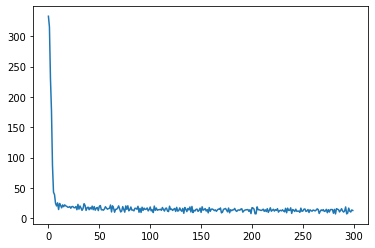

In [84]:
import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

In [87]:
print(predict(x[1]))

[[0.00881409 0.91349668 0.07768923]]
